**ÍNDEX**
1. Passos previs
    * Importar paquets
    * Funcions
    * Càrrega de dades
2. Train i test
3. Regressió lineal múltiple
    * Avaluació
4. KNN
    * Hyperparameter tuning
    * Avaluació
5. Decision tree
    * Hyperparameter tuning
    * Avaluació
6. Random Forest
    * Hyperparameter tuning
    * Avaluació
7. XGBoost
    * Hyperparameter tuning
    * Avaluació

# Passos previs

## Importar

In [1]:
import csv
import pandas as pd
import numpy as np
import mglearn
import seaborn as sns
import locale
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import re
%matplotlib inline
matplotlib.style.use('ggplot')
## modificar tamany figura
from matplotlib.pyplot import figure
from math import sqrt
from statistics import mean 

import os

## feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


## Train & test
from sklearn.model_selection import train_test_split


## errors

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Decision tree
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
## plot DT
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Random forest
from sklearn.ensemble import RandomForestRegressor

## Escalar
from sklearn.preprocessing import MinMaxScaler

## KNN
from sklearn import neighbors

## XGBoost
import xgboost as xgb
from xgboost import plot_importance


## Hyperpar tuning
from sklearn.model_selection import GridSearchCV

## Cross-Validation
from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Funcions

In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    
def creating_model_XGB(model,X_train,Y_train,X_test,Y_test,eval_metric,early):
    # Training
    model.fit(X_train, Y_train,eval_set=[(X_train, Y_train),(X_test, Y_test)],
             eval_metric=eval_metric,verbose=True,early_stopping_rounds=early) 


    # Performance
    evals_result = model.evals_result()
    epochs = len(evals_result['validation_0'][eval_metric])
    x_axis = range(0, epochs)


    plt.plot(x_axis, evals_result['validation_0'][eval_metric], label='Train')
    plt.plot(x_axis, evals_result['validation_1'][eval_metric], label='Test')
    plt.legend(),plt.ylabel('RMSE'),plt.title('XGBoost RMSE Train VS Test')
    plt.show()


    
def plot_feat_imp(model, number,predictors):
    feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)


    feat_imp = feat_imp[0:number]
    name = []
    for i in feat_imp.index.tolist():
        name.append(predictors[i])


    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.xticks(range(0, len(feat_imp)),name, rotation='vertical')
    plt.ylabel('Feature Importance Score')

    
def model_scores(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    r2_train = round(model.score(X_train, Y_train), 4)
    r2_test = round(model.score(X_test, Y_test), 4)
    r2 = [r2_train, r2_test]
    pred_train = np.round(model.predict(X_train))
    pred_test = np.round(model.predict(X_test))
    mse_train = round(mean_squared_error(Y_train, pred_train), 4)
    mse_test = round(mean_squared_error(Y_test, pred_test), 4)
    mse = [mse_train, mse_test]
    rmse_train = round(sqrt(mse_train), 4)
    rmse_test = round(sqrt(mse_test), 4)
    rmse = [rmse_train, rmse_test]
    mae_train = round(mean_absolute_error(Y_train, pred_train), 4)
    mae_test = round(mean_absolute_error(Y_test, pred_test), 4)
    mae = [mae_train, mae_test]
    scores = pd.DataFrame([r2, mse, rmse, mae])
    scores = scores.rename(columns={0: "Train", 1: "Test"}, index={0:"R2", 1:"MSE", 2:"RMSE", 3:"MAE"})
    
    return [print(scores)]




## Càrrega de dades

In [3]:
mainpath = "C:/Users/miquel.vallverdu/Desktop/Miquel/TFG/Repos/Bismart-P19824-PrediccionOcupacionHoteles_TFG_MVallverdu/dataset/"
#mainpath = "C:/Users/Miquel/Desktop/Miquel/Estudis/ESTADISTICA/TFG/"

df = pd.read_csv(mainpath + "dfModel.csv", sep = ",")

In [4]:
df.head()

,NHab,S2H,S3H,S52H,PreuHab,diaAño,weather,temp,mes,diaSemana,findes,idhotel_DON,idhotel_MME,idhotel_PAV,idhotel_SAL,idhotel_TAU,idhotel_TOS,idcliente_OL_MEDITERRANEO,idcliente_Otros,idcliente_TUI_UK_LTD,idtipohab_FAM,idtipohab_IND,idtipohab_PREM,idtipohab_SUI,idregimen_MP,idregimen_PC,idregimen_SHAB,idregimen_TI,idsegmento_VACAC,id_canal_DIRECTO,id_canal_GRUPOS,id_canal_ONLINE,id_canal_TTOO,idpais_cliente_EAU,idpais_cliente_EE,idpais_cliente_ES,idpais_cliente_ESC,idpais_cliente_GB,idpais_cliente_IS,idpais_cliente_OE,temporada_baja,holiday_No festiu,fechaocupacion
0,0,0,0,0,90.895386,87,1,16.0,3,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2018-03-28
1,25,22,18,0,98.694182,87,1,16.0,3,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2018-03-28
2,5,2,2,0,77.461817,87,1,16.0,3,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2018-03-28
3,18,10,8,0,86.157831,87,1,16.0,3,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2018-03-28
4,1,0,0,0,119.454546,87,1,16.0,3,3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2018-03-28


# Train i test

In [4]:
features_df = df.drop(['NHab',], axis = 1)
target = df.NHab

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features_df.drop(['fechaocupacion', 'diaAño'], axis = 1), target, random_state=0)
train = x_train.join(y_train)
test = x_test.join(y_test)

# Regressió lineal múltiple

In [7]:
modreg = LinearRegression()
modreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
for i in range(5,11):
    model = LinearRegression()
    scores = cross_val_score(modreg, x_train, y_train, cv = i)
    print("Mitjana cross-validation amb {:d} particions: {:.3f}".format(i, scores.mean()))

Mitjana cross-validation amb 5 particions: 0.886
Mitjana cross-validation amb 6 particions: 0.886
Mitjana cross-validation amb 7 particions: 0.885
Mitjana cross-validation amb 8 particions: 0.888
Mitjana cross-validation amb 9 particions: 0.887
Mitjana cross-validation amb 10 particions: 0.887


Les dades no depenen del nombre de particions que es facin en el cross-validation.

## Avaluació

In [9]:
model_scores(modreg, x_train, y_train, x_test, y_test)

        Train     Test
R2     0.8842   0.8989
MSE   37.4227  34.3760
RMSE   6.1174   5.8631
MAE    1.5308   1.5747


[None]

# K-Nearest Neighbors (KNN)

## Hyperparameter tuning

In [53]:
params = {'n_neighbors':[3,4,5,6,7,8,9,10,11]}
np.random.seed(42)
knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5, n_jobs=-1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'n_neighbors': 5}

In [6]:
params = {'n_neighbors':[5],
         'p':[1,2,3,4,5]}
np.random.seed(42)
knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5, n_jobs=-1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5], 'p': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'n_neighbors': 5, 'p': 1}

## Avaluació

Model estàndard

In [15]:
knn = neighbors.KNeighborsRegressor(n_jobs=-1)

In [16]:
model_scores(knn, x_train, y_train, x_test, y_test)

        Train     Test
R2     0.9639   0.9477
MSE   11.7058  17.7865
RMSE   3.4214   4.2174
MAE    1.0849   1.4133


[None]

Model amb paràmetres optimitzats

In [14]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5, p=2, n_jobs=-1)

Un model amb p=1 té millor precisió test però té més overfitting, així que es prefereix reduïr l'overfitting

In [15]:
model_scores(knn, x_train, y_train, x_test, y_test)

        Train     Test
R2     0.9639   0.9477
MSE   11.7058  17.7865
RMSE   3.4214   4.2174
MAE    1.0849   1.4133


[None]

Per aquest algoritme, els paràmetres òptims són els mateixos que venen per defecte.

# Arbre de regressió

## Hyperparameter tuning

Optimització *max_depth*

In [97]:
params = {'max_depth': [5,6,7,8,9],
          'random_state': [42]
         }

t = DecisionTreeRegressor()

model = GridSearchCV(t, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9], 'random_state': [42]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

{'max_depth': 8, 'random_state': 42}

Optimització *min_samples_leaf* i *min_samples_split*

In [98]:
params = {'max_depth': [8],
          'max_features': ['auto'],
          'min_samples_leaf': [1,2,3,4,6,8,10],
          'min_samples_split': [2,3,4,5,7,9,12],
          'random_state': [42]
         }

t = DecisionTreeRegressor()

model = GridSearchCV(t, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [8], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3, 4, 6, 8, 10],
                   

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'random_state': 42}

Optimització de *min_impurity_decrease*

In [101]:
params = {'max_depth': [8],
          'min_samples_leaf': [2],
          'min_samples_split': [5],
          'min_impurity_decrease': np.arange(0.0,0.3,0.02),
          'random_state': [42]
         }

t = DecisionTreeRegressor()

model = GridSearchCV(t, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [8],
                         'min_impurity_decrease': array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.1

{'max_depth': 8,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'random_state': 42}

Optimització de *max_features*

In [102]:
params = {'max_depth': [8],
          'max_features': ['auto', 'sqrt', 5,10,15,20,25,30,35,40],
          'min_samples_leaf': [2],
          'min_samples_split': [5],
          'min_impurity_decrease': [0],
          'random_state': [42]
         }

t = DecisionTreeRegressor()

model = GridSearchCV(t, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [8],
                         'max_features': ['auto', 'sqrt', 5, 10, 15, 20, 25, 30,
                                 

{'max_depth': 8,
 'max_features': 35,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'random_state': 42}


## Avaluació

Model estàndard

In [37]:
tree = DecisionTreeRegressor(
 random_state = 42)
## valors per defecte

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [38]:
model_scores(tree, x_train, y_train, x_test, y_test)

       Train     Test
R2    1.0000   0.9411
MSE   0.0001  19.9748
RMSE  0.0100   4.4693
MAE   0.0001   1.1295


[None]

Model amb paràmetres optimitzats

In [273]:
tree = DecisionTreeRegressor(ccp_alpha = 0.02,
 max_depth = 8,
 max_features = 36,
 min_samples_leaf = 2,
 min_samples_split = 2,
 min_impurity_decrease = 0,
 random_state = 42)


In [274]:
model_scores(tree, x_train, y_train, x_test, y_test)

       Train     Test
R2    0.9729   0.9439
MSE   8.7759  19.1096
RMSE  2.9624   4.3715
MAE   1.1784   1.3071


[None]

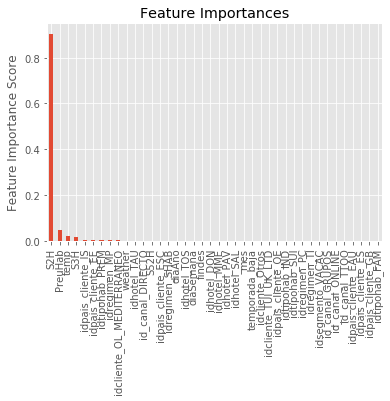

In [275]:
plot_feat_imp(tree, x_train.shape[1], features_df.columns.tolist())

In [41]:
tree = DecisionTreeRegressor(ccp_alpha = 0.02,
 max_depth = 12,
 max_features = 34,
 min_samples_leaf = 2,
 min_samples_split = 2,
 splitter = "random",
 random_state = 42)
## augmentant 0.01 ccp_alpha reduim 0.04 aprox overfitting i 0.03 la precisió test

DecisionTreeRegressor(ccp_alpha=0.02, criterion='mse', max_depth=12,
                      max_features=34, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='random')

In [42]:
model_scores(tree, x_train, y_train, x_test, y_test)

       Train     Test
R2    0.9725   0.9623
MSE   8.9310  12.8927
RMSE  2.9885   3.5906
MAE   1.1422   1.2513


[None]

# Random forest

## Hyperparameter tuning

Optimització de *max_depth*

In [14]:
params = {'max_depth': [7,8,9,10,11,12],
          'random_state': [42],
          'n_estimators': [16]
         }

rf = RandomForestRegressor()

model = GridSearchCV(rf, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

{'max_depth': 12, 'n_estimators': 16, 'random_state': 42}

Optimització de *min_samples_split* i *min_samples_leaf*

In [15]:
params = {'max_depth': [12],
          'max_features': ['auto'],
          'min_samples_leaf': [1,2,3,4,5],
          'min_samples_split': [2,3,4,5,6,7],
          'random_state': [42],
          'n_estimators': [16]
         }

rf = RandomForestRegressor()

model = GridSearchCV(rf, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

{'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 16,
 'random_state': 42}

*Optimització de max_features*

In [16]:
params = {'max_depth': [12],
          'max_features': ['auto', 'sqrt', 5,10,15,20,25,30,35,40],
          'min_samples_leaf': [1],
          'min_samples_split': [2],
          'random_state': [42],
          'n_estimators': [16]
         }

rf = RandomForestRegressor()

model = GridSearchCV(rf, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_



GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

{'max_depth': 12,
 'max_features': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 16,
 'random_state': 42}

Optimització de *n_estimators*

In [11]:
params = {'n_estimators': [1,2,5,10,16,24,32],
          'max_depth': [12],
          'max_features': [15],
          'min_samples_leaf': [1],
          'min_samples_split': [2],
          'random_state': [42]
         }

rf = RandomForestRegressor()

model = GridSearchCV(rf, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

{'max_depth': 12,
 'max_features': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 16,
 'random_state': 42}

## Avaluació

Model estàndard

In [43]:
rf = RandomForestRegressor(
 random_state = 42)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [44]:
model_scores(rf, x_train, y_train, x_test, y_test)

       Train     Test
R2    0.9955   0.9607
MSE   1.4805  13.3702
RMSE  1.2168   3.6565
MAE   0.2836   0.9197


[None]

Model amb paràmetres optimitzats

In [10]:
rf = RandomForestRegressor(ccp_alpha = 0.0,
 max_depth = 12,
 max_features = 15,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_impurity_decrease = 0.0,
 n_estimators = 16,
 random_state = 42,
 n_jobs = -1)


In [11]:
model_scores(rf, x_train, y_train, x_test, y_test)

       Train     Test
R2    0.9864   0.9617
MSE   4.4499  13.0338
RMSE  2.1095   3.6102
MAE   0.7834   1.0224


[None]

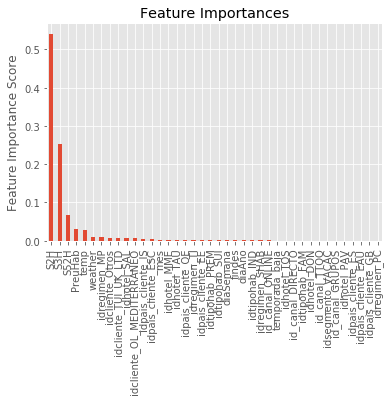

In [60]:
plot_feat_imp(rf, x_train.shape[1], features_df.columns.tolist())

# XGBoost

## Hyperparameter tuning

Optimització de *max_depth* i *min_child_weight*

In [30]:
params = {'max_depth': [9],
          'min_child_weight': range(1,11,2),
          'colsample_bytree': [0.5],
          'subsample': [0.5],
          'random_state': [42],
          'n_estimators': [20]
         }

xg = xgb.XGBRegressor()

model = GridSearchCV(xg, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

[17:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'max_depth': [9],
                         'min_child_weight': range(1, 11, 2),
  

{'colsample_bytree': 0.5,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 20,
 'random_state': 42,
 'subsample': 0.5}

Optimització de *gamma*

In [65]:
params = {'max_depth': [9],
          'min_child_weight': [1],
          'colsample_bytree': [0.5],
          'subsample': [0.5],
          'gamma': np.arange(0,0.1,0.01),
          'random_state': [42]
         }

xg = xgb.XGBRegressor()

model = GridSearchCV(xg, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

[17:53:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.5],
                         'gamma': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'max_depth': 9,
 'min_child_weight': 1,
 'random_state': 42,
 'subsample': 0.5}

Optimització de *subsample* i *colsample_bytree*

In [74]:
params = {'max_depth': [9],
          'min_child_weight': [1],
          'colsample_bytree': [0.3,0.4,0.5,0.6,0.7],
          'subsample': [0.3,0.4,0.5,0.6,0.7],
          'gamma': [0.0],
          'random_state': [42]
         }

xg = xgb.XGBRegressor()

model = GridSearchCV(xg, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:13:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'gamma': [0.0], 'max_depth': [9],
   

{'colsample_bytree': 0.6,
 'gamma': 0.0,
 'max_depth': 9,
 'min_child_weight': 1,
 'random_state': 42,
 'subsample': 0.4}

Optimització de *reg_alpha* i *reg_lambda*

In [78]:
params = {'max_depth': [9],
          'min_child_weight': [1],
          'colsample_bytree': [0.6],
          'subsample': [0.4],
          'gamma': [0],
          'reg_alpha': [0, 0.02, 0.04, 0.06, 0.08, 0.1],
          'reg_lambda': [0, 0.02, 0.04, 0.06, 0.08, 0.1],
          'random_state': [42]
         }

xg = xgb.XGBRegressor()

model = GridSearchCV(xg, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:27:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6], 'gamma': [0],
                         'max_depth': [9], 'min_child_weight': [1],
      

{'colsample_bytree': 0.6,
 'gamma': 0,
 'max_depth': 9,
 'min_child_weight': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 0.08,
 'subsample': 0.4}

Optimització *learning_rate* i *n_estimators*

In [29]:
params = {'max_depth': [9],
          'min_child_weight': [1],
          'colsample_bytree': [0.6],
          'subsample': [0.4],
          'gamma': [0],
          'reg_alpha': [0],
          'reg_lambda': [0.08],
          'learning_rate': np.arange(0.00,0.35,0.05),
          'n_estimators': range(16,24),
          'random_state': [42]
         }

xg = xgb.XGBRegressor()

model = GridSearchCV(xg, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:18:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6], 'gamma': [0],
                         'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
                         'max_depth': [9], 'min_child_weight': [1],
                         'n_estimators': range(16, 24), 

{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.2,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 23,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 0.08,
 'subsample': 0.4}

## Avaluació

Model estàndard

In [132]:
xg = xgb.XGBRegressor(
 random_state= 42,
    n_jobs=-1
 )

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [133]:
model_scores(xg, x_train, y_train, x_test, y_test)

[19:45:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
        Train     Test
R2     0.9611   0.9334
MSE   12.6037  22.6524
RMSE   3.5502   4.7595
MAE    1.1498   1.2772


[None]

Model amb paràmetres optimitzats

In [6]:
xg = xgb.XGBRegressor(random_state = 42,
                      n_jobs = -1,
                     max_depth = 9,
                     min_child_weight=1,
                     subsample = 0.7,
                     colsample_bytree=0.8,
                     reg_alpha=0.01,
                     reg_lambda=0.08,
                     learning_rate=0.09,
                     n_estimators=80)

In [7]:
model_scores(xg, x_train, y_train, x_test, y_test)

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:09:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
       Train    Test
R2    0.9949  0.9723
MSE   1.6880  9.4449
RMSE  1.2992  3.0733
MAE   0.6166  0.9540


[None]

<Figure size 864x288 with 0 Axes>

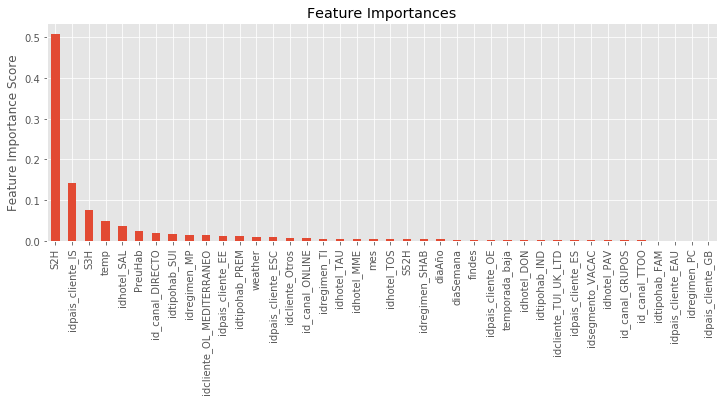

In [12]:
plt.figure(figsize = (12,4))
plot_feat_imp(xg, x_train.shape[1], features_df.columns.tolist())

[20:02:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[0]	validation_0-rmse:18.4297	validation_1-rmse:18.9866
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:16.8325	validation_1-rmse:17.4072
[2]	validation_0-rmse:15.3637	validation_1-rmse:15.9732
[3]	validation_0-rmse:14.0372	validation_1-rmse:14.6889
[4]	validation_0-rmse:12.8232	validation_1-rmse:13.478
[5]	validation_0-rmse:11.731	validation_1-rmse:12.3777
[6]	validation_0-rmse:10.7297	validation_1-rmse:11.4196
[7]	validation_0-rmse:9.84589	validation_1-rmse:10.5856
[8]	validation_0-rmse:9.04646	validation_1-rmse:9.80421
[9]	validation_0-rmse:8.32398	validation_1-rmse:9.11346
[10]	validation_0-rmse:7.6249	validation_1-rmse:8.44229
[11]	validation_0-rmse:7.00432	validation_1-rmse:7.8428
[12]	validation_0-rmse:6.4402	validation_1-rmse:7.3316
[13]	validation_0-rmse:5.95489	validation_1-rmse:6.89516
[14]	validation_0-rmse:5.5041	validation_1-rmse:6.46054
[

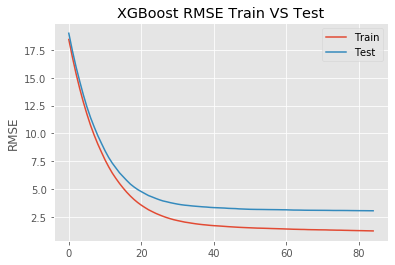

In [180]:
creating_model_XGB(xg, x_train, y_train, x_test, y_test, "rmse", 100)